<a href="https://colab.research.google.com/github/MukundIsGod/SceneDetection/blob/master/LightEnhancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/soumik12345/MIRNet
%cd MIRNet

Cloning into 'MIRNet'...
remote: Enumerating objects: 248, done.
remote: Counting objects: 100% (248/248), done.
remote: Compressing objects: 100% (191/191), done.
remote: Total 248 (delta 113), reused 166 (delta 46), pack-reused 0
Receiving objects: 100% (248/248), 28.12 MiB | 15.94 MiB/s, done.
Resolving deltas: 100% (113/113), done.
/content/MIRNet


In [2]:
!pip install -q wandb

     |████████████████████████████████| 2.0MB 5.9MB/s 
     |████████████████████████████████| 102kB 10.3MB/s 
     |████████████████████████████████| 133kB 52.6MB/s 
     |████████████████████████████████| 163kB 48.0MB/s 
     |████████████████████████████████| 71kB 8.0MB/s 


In [4]:
from glob import glob
from PIL import Image
from matplotlib import pyplot as plt
from mirnet.inference import Inferer
from mirnet.utils import download_dataset, plot_result

import tensorflow as tf

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
inferer = Inferer()
inferer.download_weights('1sUlRD5MTRKKGxtqyYDpTv7T3jOW6aVAL')
inferer.build_model(
    num_rrg=3, num_mrb=2, channels=64,
    weights_path='low_light_weights_best.h5'
)
inferer.model.summary()

Downloading...
From: https://drive.google.com/uc?id=1sUlRD5MTRKKGxtqyYDpTv7T3jOW6aVAL
To: /content/MIRNet/low_light_weights_best.h5
148MB [00:00, 169MB/s]


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, None, None, 6 1792        input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, None, None, 6 36928       conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_10 (Conv2D)              (None, None, None, 6 36928       conv2d_1[0][0]                   
______________________________________________________________________________________________

In [8]:
inferer.model.save('mirnet')

INFO:tensorflow:Assets written to: mirnet/assets


In [9]:
IMAGE_LOC = '/content/drive/My Drive/ExDark/Bicycle/2015_00001.png'

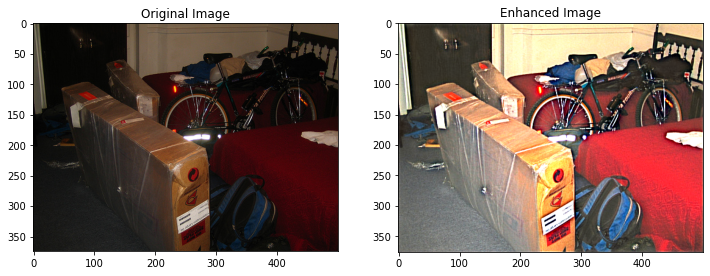

In [10]:
original_image, output_image = inferer.infer(IMAGE_LOC)
plot_result(original_image, output_image)